(offeffort-transect-filtering)=

# Filtering off-effort transect intervals

Text here.

<iframe src="../../_static/offeffort_transect_filtering.html" width="700" height="400"></iframe>

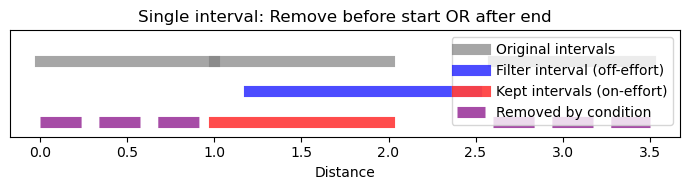

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
nasc_intervals = np.array([
    [0, 1],   # before filter (should be removed)
    [1, 2],   # overlaps filter (should be kept)
    [2.6, 3.5] # after filter (should be removed)
])
filter_interval = [1.2, 2.5]  # filter_log_starts[0], filter_log_ends[0]

removed_intervals = []
kept_intervals = []
for start, end in nasc_intervals:
    if (end < filter_interval[0]) or (start > filter_interval[1]):
        removed_intervals.append([start, end])
    else:
        kept_intervals.append([start, end])
removed_intervals = np.array(removed_intervals)
kept_intervals = np.array(kept_intervals)

fig, ax = plt.subplots(figsize=(7, 2))

# Top: All original intervals (gray)
for start, end in nasc_intervals:
    ax.plot([start, end], [1.1, 1.1], color='gray', lw=8, alpha=0.7)

# Middle: Filter interval (blue, region to be removed)
ax.plot([filter_interval[0], filter_interval[1]], [1.0, 1.0], color='blue', lw=8, alpha=0.7)

# Bottom: Kept intervals (red, what remains)
for start, end in kept_intervals:
    ax.plot([start, end], [0.9, 0.9], color='red', lw=8, alpha=0.7)
# Bottom: Removed intervals (purple, what is removed by this condition)
for start, end in removed_intervals:
    ax.plot([start, end], [0.9, 0.9], color='purple', lw=8, alpha=0.7, linestyle='dashed')

ax.plot([], [], color='gray', lw=8, alpha=0.7, label='Original intervals')
ax.plot([], [], color='blue', lw=8, alpha=0.7, label='Filter interval (off-effort)')
ax.plot([], [], color='red', lw=8, alpha=0.7, label='Kept intervals (on-effort)')
ax.plot([], [], color='purple', lw=8, alpha=0.7, linestyle='dashed', label='Removed by condition')
ax.legend(loc='upper right')
ax.set_yticks([])
ax.set_ylim(0.85, 1.2)
ax.set_xlabel("Distance")
ax.set_title("Single interval: Remove before start OR after end")
plt.tight_layout()
plt.show()